# NLP using Spacy library

In [21]:
text_1 = "Tokenization is a fundamental process in natural 4 language processing (NLP) that involves breaking 27 down a text into individual units called tokens. These tokens can be words, subwords, or even characters, depending on the level of granularity required for a particular application. The goal of tokenization is to create a structured and manageable representation of textual data, 60 enabling machines to better understand and process language. This process is crucial in various NLP tasks, such as machine translation, text classification, and sentiment analysis, where the input data needs to be converted into a format 8990 suitable for analysis and modeling. Tokenization facilitates the extraction of meaningful information from text, providing a foundation for subsequent linguistic analysis and computational understanding of language patterns."

# Sentence Detection

In [22]:
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp(text_1)
sent = list(doc.sents)
print(sent)

[Tokenization is a fundamental process in natural 4 language processing (NLP) that involves breaking 27 down a text into individual units called tokens., These tokens can be words, subwords, or even characters, depending on the level of granularity required for a particular application., The goal of tokenization is to create a structured and manageable representation of textual data, 60 enabling machines to better understand and process language., This process is crucial in various NLP tasks, such as machine translation, text classification, and sentiment analysis, where the input data needs to be converted into a format 8990 suitable for analysis and modeling., Tokenization facilitates the extraction of meaningful information from text, providing a foundation for subsequent linguistic analysis and computational understanding of language patterns.]


# Stop words

In [23]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

raw_words = word_tokenize(text_1)
print("words with stop words :", len(raw_words))

stop_words = stopwords.words("english")
words = [word for word in raw_words if word not in stop_words]
print("words without stop words :", len(words))
print("\n")

print("******** Words without stopwords **********")
print("\n")
print(words)

words with stop words : 139
words without stop words : 96


******** Words without stopwords **********


['Tokenization', 'fundamental', 'process', 'natural', '4', 'language', 'processing', '(', 'NLP', ')', 'involves', 'breaking', '27', 'text', 'individual', 'units', 'called', 'tokens', '.', 'These', 'tokens', 'words', ',', 'subwords', ',', 'even', 'characters', ',', 'depending', 'level', 'granularity', 'required', 'particular', 'application', '.', 'The', 'goal', 'tokenization', 'create', 'structured', 'manageable', 'representation', 'textual', 'data', ',', '60', 'enabling', 'machines', 'better', 'understand', 'process', 'language', '.', 'This', 'process', 'crucial', 'various', 'NLP', 'tasks', ',', 'machine', 'translation', ',', 'text', 'classification', ',', 'sentiment', 'analysis', ',', 'input', 'data', 'needs', 'converted', 'format', '8990', 'suitable', 'analysis', 'modeling', '.', 'Tokenization', 'facilitates', 'extraction', 'meaningful', 'information', 'text', ',', 'providing', '

# Removing Punctuations

In [27]:
word_without_punc = []

for word in words:
    if word.isalpha():
        word_without_punc.append(word)
        
print("number of words without punctuation :", len(word_without_punc))
print("\n")
print(word_without_punc)

number of words without punctuation : 76


['Tokenization', 'fundamental', 'process', 'natural', 'language', 'processing', 'NLP', 'involves', 'breaking', 'text', 'individual', 'units', 'called', 'tokens', 'These', 'tokens', 'words', 'subwords', 'even', 'characters', 'depending', 'level', 'granularity', 'required', 'particular', 'application', 'The', 'goal', 'tokenization', 'create', 'structured', 'manageable', 'representation', 'textual', 'data', 'enabling', 'machines', 'better', 'understand', 'process', 'language', 'This', 'process', 'crucial', 'various', 'NLP', 'tasks', 'machine', 'translation', 'text', 'classification', 'sentiment', 'analysis', 'input', 'data', 'needs', 'converted', 'format', 'suitable', 'analysis', 'modeling', 'Tokenization', 'facilitates', 'extraction', 'meaningful', 'information', 'text', 'providing', 'foundation', 'subsequent', 'linguistic', 'analysis', 'computational', 'understanding', 'language', 'patterns']


# Frequency Distribution

In [28]:
from nltk.probability import FreqDist
frequency = FreqDist(word_without_punc)
print(frequency.most_common(10))

[('process', 3), ('language', 3), ('text', 3), ('analysis', 3), ('Tokenization', 2), ('NLP', 2), ('tokens', 2), ('data', 2), ('fundamental', 1), ('natural', 1)]


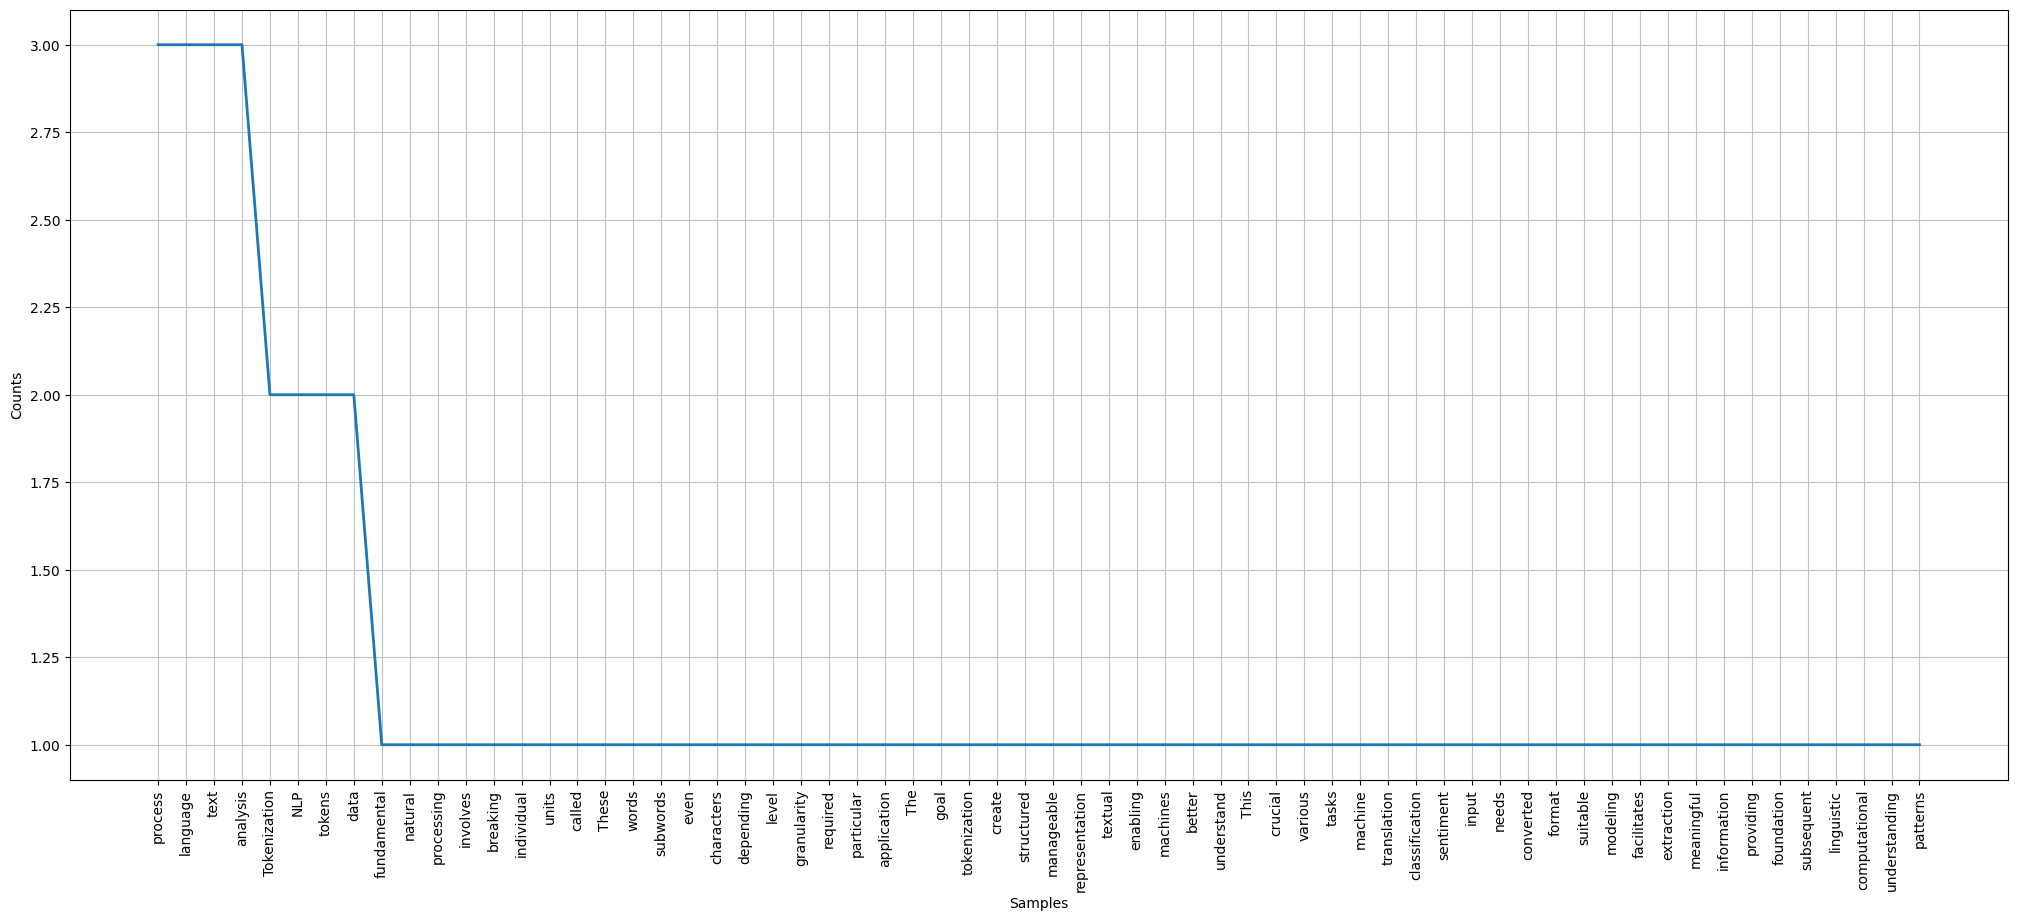

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize = (25, 10))
frequency.plot()
plt.show()

# Part of Speech Tagging

In [42]:
for word in doc:
    print(
        f"""
        TOKEN : {str(word)}
        TAG : {str(word.tag_)}     POS : {word.pos_}
        Explanation : {spacy.explain(word.tag_)}"""
    )


        TOKEN : Tokenization
        TAG : NN      POS : NOUN
        Explanation : noun, singular or mass

        TOKEN : is 
        TAG : VBZ     POS : AUX
        Explanation : verb, 3rd person singular present

        TOKEN : a  
        TAG : DT      POS : DET
        Explanation : determiner

        TOKEN : fundamental
        TAG : JJ      POS : ADJ
        Explanation : adjective (English), other noun-modifier (Chinese)

        TOKEN : process
        TAG : NN      POS : NOUN
        Explanation : noun, singular or mass

        TOKEN : in 
        TAG : IN      POS : ADP
        Explanation : conjunction, subordinating or preposition

        TOKEN : natural
        TAG : JJ      POS : ADJ
        Explanation : adjective (English), other noun-modifier (Chinese)

        TOKEN : 4  
        TAG : CD      POS : NUM
        Explanation : cardinal number

        TOKEN : language
        TAG : NN      POS : NOUN
        Explanation : noun, singular or mass

        TOKEN : p

# Denpendency Parsing

In [43]:
from spacy import displacy
dp_word = nlp("Nothing will never happen as we planed in the cursed wold")
displacy.render(dp_word, style = "dep", jupyter = True)

# Word Cloud

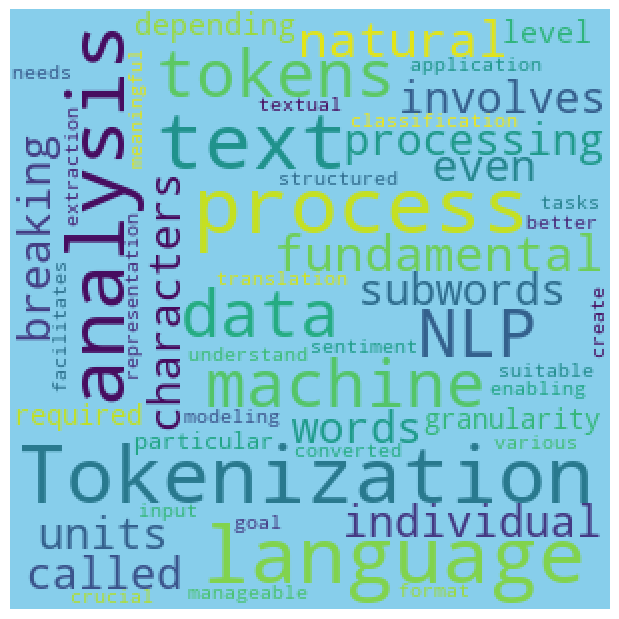

In [73]:
from wordcloud import WordCloud

wc = WordCloud(
    width = 300,
    height = 300,
    background_color = "SkyBlue",
    min_font_size = 10).generate(text_1)    


plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# key word Extraction

In [93]:
from rake_nltk import Rake

rake = Rake()
rake.extract_keywords_from_text(text_1)
keywords = rake.get_ranked_phrases()
print(keywords)

['natural 4 language processing', 'individual units called tokens', 'involves breaking 27', 'format 8990 suitable', '60 enabling machines', 'input data needs', 'various nlp tasks', 'subsequent linguistic analysis', 'language patterns', 'textual data', 'process language', 'sentiment analysis', 'particular application', 'meaningful information', 'manageable representation', 'machine translation', 'granularity required', 'even characters', 'computational understanding', 'better understand', 'fundamental process', 'tokenization facilitates', 'text classification', 'tokens', 'nlp', 'analysis', 'process', 'tokenization', 'tokenization', 'text', 'text', 'words', 'subwords', 'structured', 'providing', 'modeling', 'level', 'goal', 'foundation', 'extraction', 'depending', 'crucial', 'create', 'converted']


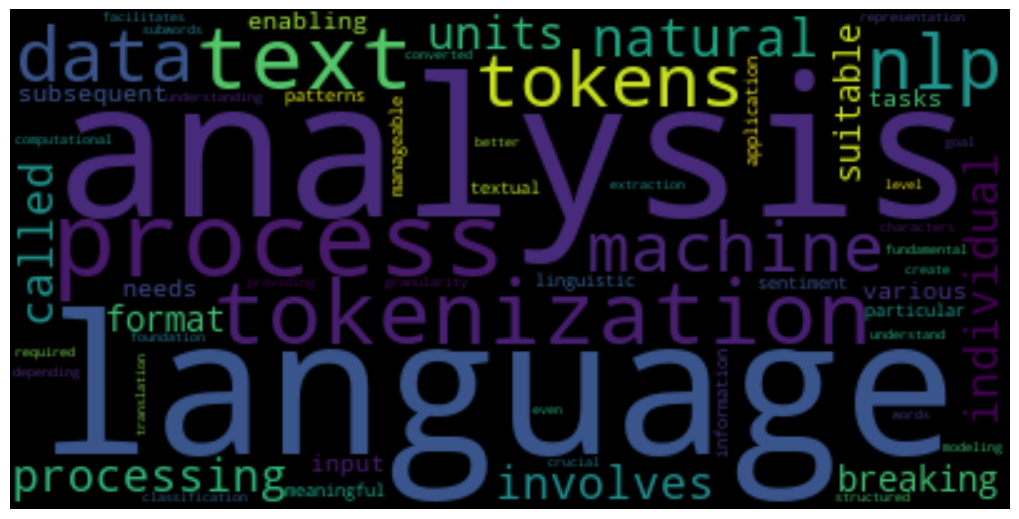

In [94]:
wc = WordCloud().generate(' '.join(keywords))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [95]:
import yake

yake = yake.KeywordExtractor()
kwe = yake.extract_keywords(text_1)
print(kwe)

[('individual units called', 0.006960814031827107), ('units called tokens', 0.011657700953535466), ('involves breaking', 0.028170324054873398), ('individual units', 0.035447448708057605), ('units called', 0.035447448708057605), ('called tokens', 0.05840527290568178), ('language processing', 0.07357786519636939), ('fundamental process', 0.09365338473605493), ('NLP', 0.12390392128687142), ('Tokenization', 0.13998126939585542), ('NLP tasks', 0.14750939378774844), ('natural', 0.14808065200172843), ('processing', 0.14808065200172843), ('breaking', 0.14808065200172843), ('tokens', 0.14912196125235588), ('process', 0.15427446945607184), ('language', 0.15427446945607184), ('analysis', 0.16287204492626778), ('text', 0.17119633059253755), ('process in natural', 0.18235862681186651)]


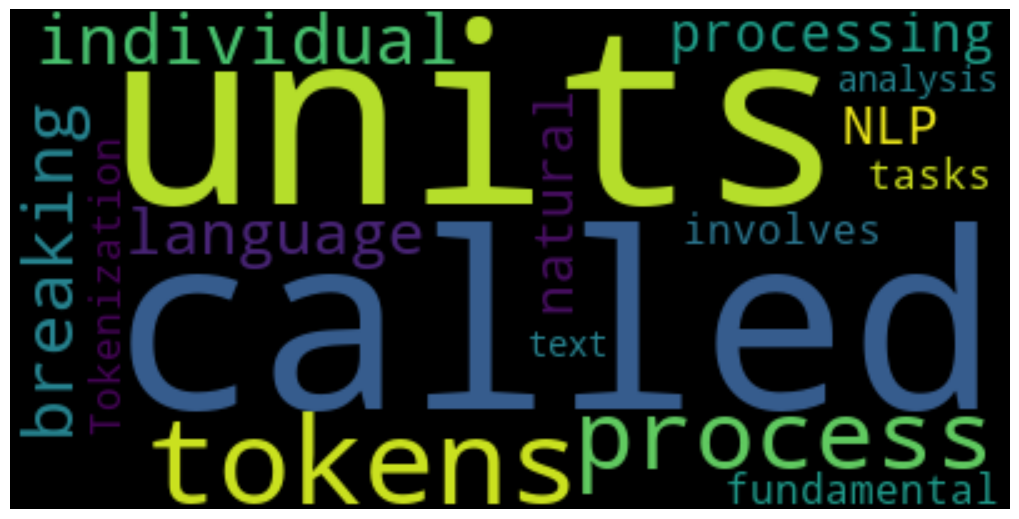

In [96]:
kwe = [kwe for kwe, _ in kwe]

wc = WordCloud().generate(' '.join(kwe))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [99]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_1)

spacy_kw = []

for chunk in doc.noun_chunks:
    if chunk.text.lower not in nlp.Defaults.stop_words:
        spacy_kw.append(chunk.text)
        
print(spacy_kw)        

['Tokenization', 'a fundamental process', 'natural 4 language processing', 'NLP', 'that', 'a text', 'individual units', 'tokens', 'These tokens', 'words', 'subwords', 'even characters', 'the level', 'granularity', 'a particular application', 'The goal', 'tokenization', 'a structured and manageable representation', 'textual data', '60 enabling machines', 'process language', 'This process', 'various NLP tasks', 'machine translation', 'text classification', 'sentiment analysis', 'the input data', 'a format', 'analysis', 'modeling', 'Tokenization', 'the extraction', 'meaningful information', 'text', 'a foundation', 'subsequent linguistic analysis', 'computational understanding', 'language patterns']


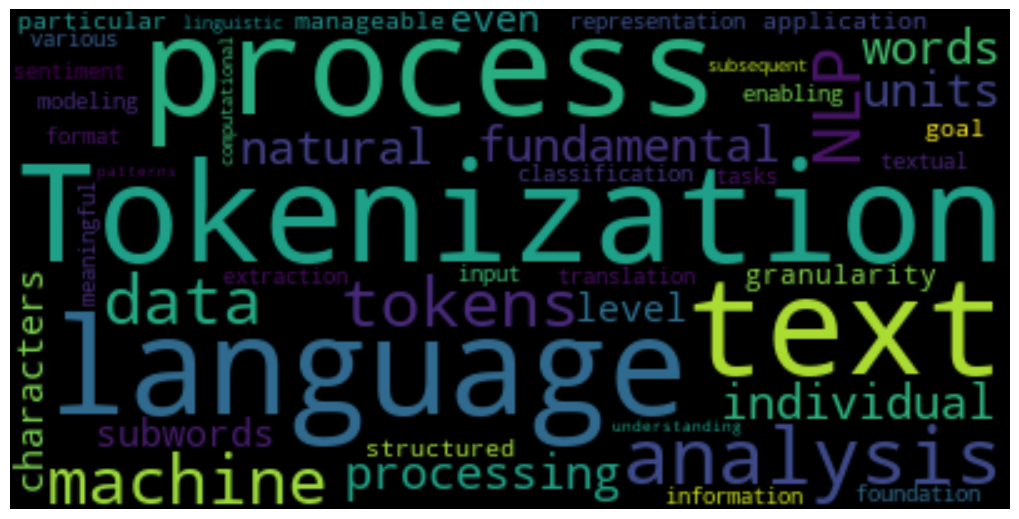

In [100]:
wc = WordCloud().generate(' '.join(spacy_kw))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [106]:
import textacy

tex = textacy.load_spacy_lang("en_core_web_sm")
doc_1 = textacy.make_spacy_doc(text_1, lang = tex)

rank = textacy.extract.keyterms.textrank(doc_1, 
                                         normalize = "lemma", 
                                         topn=5)

In [107]:
wc = WordCloud().generate(' '.join(rank))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

TypeError: sequence item 0: expected str instance, tuple found

# 6 Naïve Bayes Classifier

In [44]:
import pandas as pd
df = pd.read_csv(r"D:\Datasets\Datasets\Tweets.csv")
df = df.drop(["textID", "selected_text"], axis = 1)

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["sentiment"] = le.fit_transform(df["sentiment"])

In [46]:
df = df.dropna()

In [50]:
from nltk.stem import PorterStemmer
import re

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', '', text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

In [51]:
df["clean_text"] = df["text"].apply(preprocess)

In [52]:
df.shape

(27480, 3)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cv = TfidfVectorizer()

x = cv.fit_transform(df["clean_text"][:5000]).toarray()
y = df["sentiment"][:5000]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [58]:
print(cv.vocabulary_)

{'idhaverespondedifiwerego': 1622, 'sooosadiwillmissyouhereinsandiego': 3807, 'mybossisbullyingm': 2967, 'whatinterviewleavemealon': 4581, 'sonsofwhycouldnttheyputthemonthereleaseswealreadybought': 3799, 'httpwwwdothebouncycomsmfsomeshamelesspluggingforthebestrangersforumonearth': 1512, 'amfeedingsforthebabyarefunwhenheisallsmilesandcoo': 100, 'soooohigh': 3804, 'bothofy': 395, 'journeywowujustbecamecoolerheheisthatposs': 2486, 'asmuchasilovetobehopefulireckonthechancesareminimalpimnevergonnagetmycakeandstuff': 199, 'ireallyreallylikethesonglovestorybytaylorswift': 2118, 'mysharpieisrunningdangerouslylowonink': 3038, 'iwanttogotomusictonightbutilostmyvoic': 2414, 'testtestfromthelgenv': 3963, 'uhohiamsunburn': 4337, 'soktryingtoplotalternativesaswespeaksigh': 3780, 'ivebeensickforthepastfewdaysandthusmyhairlookswierdifididnthaveahatonitwouldlookhttptinyurlcommnfkw': 2382, 'isbackhomenowgonnamisseveryon': 2141, 'hesjustnotthatintoy': 1316, 'ohmarlyimsosorryihopeyoufindhersoon': 3292, 'p

In [55]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [56]:
mnb_prediction = mnb.predict(x_test)

accuracy = accuracy_score(y_test, mnb_prediction)
print(accuracy)

0.408
